In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

### On récupère les données


In [30]:
box1temoin = pd.read_csv('/users/2024/ds2/118004830/Documents/Box1_Temoin.csv')
box2hydrique = pd.read_csv('/users/2024/ds2/118004830/Documents/Box2_Stress_hydrique.csv')
box3salin = pd.read_csv('/users/2024/ds2/118004830/Documents/Box3_stress_salin.csv')
box4temoin = pd.read_csv('/users/2024/ds2/118004830/Documents/Box4_Temoin.csv')

#box1temoin.head()
#box2hydrique.head()
#box3salin.head()
#box4temoin.head()

### graphe des témoins box1

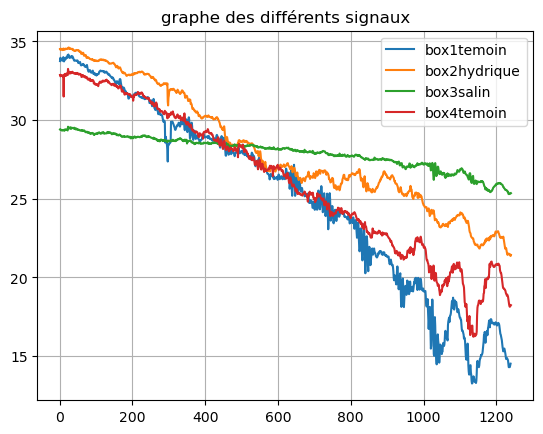

In [28]:
X1= box1temoin['X']
Y1= box1temoin['Y']
X2= box2hydrique['X']
Y2= box2hydrique['Y']
X3= box3salin['X']
Y3= box3salin['Y']
X4= box4temoin['X']
Y4= box4temoin['Y']


plt.plot(X1,Y1)
plt.plot(X2,Y2)
plt.plot(X3,Y3)
plt.plot(X4,Y4)
plt.title('graphe des différents signaux')
plt.legend(['box1temoin','box2hydrique','box3salin','box4temoin'])
plt.grid()
plt.show()

Chaque jour on doit récupérer G(pente), C(analyse harmonique) et HDR(dépend de l'énergie).  
Une prise Te toutes les 15min, on fait par jour.  
Tous les 96 points.  


### Fonction régression - tendance journalière

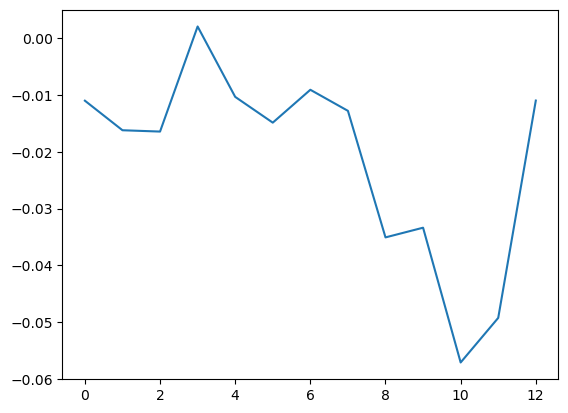

In [64]:
def regre(box):
    pentes=[]
    for i in range(0, len(box['X']), 96):
        X=box['X'][i:i+95].to_list()
        Y=box['Y'][i:i+95].to_list()
        X = np.array(X).reshape(-1, 1)
        Y = np.array(Y).reshape(-1, 1)
        reg = LinearRegression()
        reg.fit(X, Y)
        pente = reg.coef_[0][0]
        pentes.append(pente)
    return pentes

regre(box1temoin)
plt.plot(regre(box1temoin))

### Calculs de c

In [65]:
periode = np.linspace(0, len(box1temoin)-1, len(box1temoin))
pas = periode[1] - periode[0]  
T=96


# Fonctions coefficients de la série de Fourier
def a(n,box):
    return sum((box['Y']-regre(box))* np.cos(2 * np.pi * n * periode / T) * pas) * 2 / T * (1 / 2 * (n == 0) + 1 * (n != 0))

def b(n,box):
    return sum((box['Y']-regre(box)) * np.sin(2 * np.pi * n * periode / T) * pas) * 2 / T


# Fonction pour calculer les coefficients c(n) de la série de Fourier
def c(n,box):
    a_coeffs = [a(i,box) for i in range(1,n+1)]
    b_coeffs = [b(i,box) for i in range(1,n+1)]

    # Calcul des coefficients c(n)
    c_coeffs = [np.sqrt(a_coeffs[i] ** 2 + b_coeffs[i] ** 2) for i in range(n)]

    # Retourne les indices (n) et les coefficients c(n)
    return c_coeffs

c(15,box1temoin)

ValueError: operands could not be broadcast together with shapes (1239,) (13,) 

In [ ]:
faure tableau Gr H C